# Regroupement par k-moyennes (Chap 15)

## Algorithmes basés centroïdes

In [1]:
import numpy as np
A = np.array([165, 55, 70])
B = np.array([185, 60, 30])

D = (A - B)
D = D**2
D = np.sqrt(np.sum(D))

print(D)

45.0


## Exemple avec données graphiques

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
ground_truth = digits.target

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components=30)
Cx = pca.fit_transform(scale(X))
print('Variance expliquée %0.3f' 
      % sum(pca.explained_variance_ratio_))

Variance expliquée 0.893


In [4]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=10, 
                    n_init=10, random_state=1)
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

## Recherche des solutions optimales

In [5]:
import numpy as np
import pandas as pd
ms = np.column_stack((ground_truth,clustering.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles','Clusters'])
pd.crosstab(df['Données réelles'], df['Clusters'], 
            margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Données réelles,,,,,,,,,,,
0,0,0,0,0,0,177,0,1,0,0,178
1,0,96,0,0,1,0,27,0,58,0,182
2,0,24,6,1,0,1,141,0,4,0,177
3,0,7,160,7,8,0,1,0,0,0,183
4,0,2,0,4,2,0,0,157,7,9,181
5,3,3,46,0,127,0,0,2,1,0,182
6,174,5,0,0,0,1,0,0,1,0,181
7,0,1,0,155,2,0,0,0,3,18,179
8,2,102,48,2,6,1,1,0,12,0,174


In [6]:
import numpy as np
inertie = list()
for k in range(1,21):
    clustering = KMeans(n_clusters=k, 
                        n_init=10, random_state=1)
    clustering.fit(Cx)
    inertie.append(clustering.inertia_)
delta_inertie = np.diff(inertie) * -1

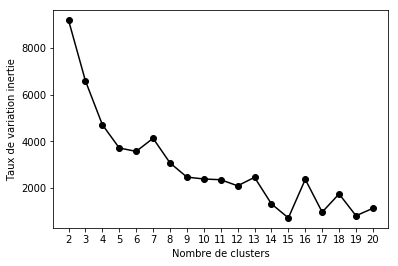

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
x_range = [k for k in range(2, 21)]
plt.xticks(x_range)
plt.plot(x_range, delta_inertie, 'ko-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Taux de variation inertie')
plt.show()

## Regroupement et big data

In [10]:
k = 10
clustering = KMeans(n_clusters=k, 
                    n_init=10, random_state=1)
clustering.fit(Cx)
inertie_kmoy = clustering.inertia_
print("Inertie de K-moyenne: %0.1f" % inertie_kmoy)

Inertie de K-moyenne: 58074.6


In [11]:
from sklearn.cluster import MiniBatchKMeans
batch_clustering = MiniBatchKMeans(n_clusters=k, 
                                   random_state=1)
taille_lot = 100
for row in range(0, len(Cx), taille_lot):
    if row+taille_lot < len(Cx):
        feed = Cx[row:row+taille_lot,:]
    else:
        feed = Cx[row:,:]
    batch_clustering.partial_fit(feed)
inertie_parlots = batch_clustering.score(Cx) * -1

print("Inertie MiniBatchKmeans: %0.1f" % inertie_parlots)

Inertie MiniBatchKmeans: 64540.8


# Classification hiérarchique ascendante

## Solution de regroupement hiérarchique

In [12]:
from sklearn.cluster import AgglomerativeClustering

Hclustering = AgglomerativeClustering(n_clusters=10, 
                               affinity='euclidean', 
                               linkage='ward')
Hclustering.fit(Cx)

ms = np.column_stack((ground_truth,Hclustering.labels_))
df = pd.DataFrame(ms, columns = ['Données réelles','Clusters'])
pd.crosstab(df['Données réelles'], 
            df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Données réelles,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,1,27,154,0,0,0,0,0,0,0,182
2,0,165,10,1,0,0,0,1,0,0,177
3,7,5,13,0,0,0,0,158,0,0,183
4,1,0,7,1,161,0,0,0,0,11,181
5,167,1,1,0,0,0,1,12,0,0,182
6,0,0,0,0,0,0,181,0,0,0,181
7,1,0,1,0,0,0,0,0,169,8,179
8,1,7,161,0,0,0,1,4,0,0,174


## Regroupement en deux phases

In [13]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=50, 
                    n_init=10,
                    random_state=1)
clustering.fit(Cx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [14]:
Kx = clustering.cluster_centers_
Kx_mapping = {case:cluster for case,
   cluster in enumerate(clustering.labels_)}

In [15]:
from sklearn.cluster import AgglomerativeClustering
Hclustering = AgglomerativeClustering(n_clusters=10,
                                      affinity='cosine', 
                                      linkage='complete')
Hclustering.fit(Kx)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=10,
            pooling_func=<function mean at 0x0000023705DA8E18>)

In [16]:
H_mapping = {case:cluster for case,
   cluster in enumerate(Hclustering.labels_)}
final_mapping = {case:H_mapping[Kx_mapping[case]]
   for case in Kx_mapping}

In [17]:
ms = np.column_stack((ground_truth,
 [final_mapping[n] for n in range(max(final_mapping)+1)]))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles','Clusters'])
pd.crosstab(df['Données réelles'], 
            df['Clusters'], margins=True)

Clusters,0,1,2,3,4,5,6,7,8,9,All
Données réelles,,,,,,,,,,,
0,0,0,0,0,0,0,178,0,0,0,178
1,0,94,60,0,0,1,0,27,0,0,182
2,3,2,11,0,0,0,0,47,113,1,177
3,169,3,0,0,0,3,0,1,3,4,183
4,0,1,1,0,168,1,4,0,3,3,181
5,17,0,0,1,1,160,0,0,1,2,182
6,0,3,1,175,0,0,2,0,0,0,181
7,0,107,0,0,1,1,0,0,2,68,179
8,61,52,14,0,0,1,0,0,32,14,174


# Regroupement basé densité avec DBScan

In [18]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=3.7, min_samples=15)
DB.fit(Cx)

DBSCAN(algorithm='auto', eps=3.7, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=1, p=None)

In [19]:
from collections import Counter
print('Nombre de clusters: %i' % len(np.unique(DB.labels_))) 
print(Counter(DB.labels_))

ms = np.column_stack((ground_truth, DB.labels_))
df = pd.DataFrame(ms, 
                  columns = ['Données réelles', 'Clusters'])

pd.crosstab(df['Données réelles'], 
            df['Clusters'], margins=True)

Nombre de clusters: 12
Counter({-1: 836, 6: 177, 0: 172, 2: 159, 1: 155, 4: 122, 5: 81, 3: 27, 10: 21, 7: 18, 8: 16, 9: 13})


Clusters,-1,0,1,2,3,4,5,6,7,8,9,10,All
Données réelles,,,,,,,,,,,,,
0,6,172,0,0,0,0,0,0,0,0,0,0,178
1,68,0,88,0,26,0,0,0,0,0,0,0,182
2,146,0,2,0,0,0,0,0,0,16,13,0,177
3,76,0,3,0,0,0,0,104,0,0,0,0,183
4,82,0,0,0,0,0,81,0,18,0,0,0,181
5,159,0,0,1,0,0,0,1,0,0,0,21,182
6,22,0,1,158,0,0,0,0,0,0,0,0,181
7,57,0,0,0,0,122,0,0,0,0,0,0,179
8,113,0,60,0,1,0,0,0,0,0,0,0,174
